In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os

import string

import cv2
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Activation
from keras.layers import MaxPool2D,Dropout,BatchNormalization

from tensorflow.keras import optimizers

from keras.callbacks import EarlyStopping
from keras import regularizers

from matplotlib import pyplot as plt

import numpy as np

import matplotlib.pyplot as plt


In [ ]:
diesease_list = ['Bacterial_spot', 'Early_blight','healthy',
                 'Late_blight','Leaf_Mold', 'Septoria_leaf_spot',
                 'Spider_mites Two-spotted_spider_mite',
                   'Target_Spot','Tomato_mosaic_virus',
                 'Tomato_Yellow_Leaf_Curl_Virus']

max_label_len = 1


In [ ]:

test_img_data = np.load('//content//drive//My Drive//SELLING COURSE AND PROJECTS//REAL TIME PROJECTS//Tomato Leaf Disease Detection//Data Files//valid_img.npy')
test_label_data = np.load('//content//drive//My Drive//SELLING COURSE AND PROJECTS//REAL TIME PROJECTS//Tomato Leaf Disease Detection//Data Files//valid_label.npy')

test_img_data = np.array(test_img_data).reshape(-1,128,128,3)
test_label_data=np.array(test_label_data)

training_img = np.load('//content//drive//My Drive//SELLING COURSE AND PROJECTS//REAL TIME PROJECTS//Tomato Leaf Disease Detection//Data Files//training_img.npy')
tr_label_data = np.load('//content//drive//My Drive//SELLING COURSE AND PROJECTS//REAL TIME PROJECTS//Tomato Leaf Disease Detection//Data Files//training_label.npy')

training_img = np.array(training_img).reshape(-1,128,128,3)
tr_label_data=np.array(tr_label_data)





In [ ]:
def Model_architecture():
    """
    This function helps to create a
    model architecture.
    Parameters
    ----------
      None
    Returns
    --------
      Model : object
    """
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(128,128,3)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPool2D(pool_size=5,padding='same'))
    model.add(Dropout(rate=0.25))

    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=5,padding='same'))

    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv2D(256, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=5,padding='same'))

    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv2D(512, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=5,padding='same'))

    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(rate=0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(rate=0.2))
    model.add(Dense(len(diesease_list)+1, activation='softmax'))

    return model


model = Model_architecture()
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 128)       147584    
                                                        

In [ ]:
from sklearn.preprocessing import label_binarize

# Assuming you have categorical labels
y_train_categorical = label_binarize(tr_label_data, classes=np.arange(len(diesease_list)+1))
y_test_categorical = label_binarize(test_label_data, classes=np.arange(len(diesease_list)+1))


In [ ]:
model = Model_architecture()
model.compile(optimizer=optimizers.Adam(lr=1e-4),
				  loss='categorical_crossentropy',
				  metrics=['accuracy']
				  )

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
        patience = 10)

history = model.fit(training_img, y_train_categorical,
						validation_data=(test_img_data, y_test_categorical),
						epochs=5,batch_size = 160, callbacks=[es])

Epoch 1/20
104/104 [==============================] - 31s 262ms/step - loss: 2.2481 - accuracy: 0.1451 - val_loss: 2.0235 - val_accuracy: 0.1818
Epoch 2/20
104/104 [==============================] - 27s 259ms/step - loss: 1.8816 - accuracy: 0.2471 - val_loss: 1.8023 - val_accuracy: 0.3111
Epoch 3/20
104/104 [==============================] - 27s 262ms/step - loss: 1.4699 - accuracy: 0.4321 - val_loss: 1.0517 - val_accuracy: 0.5742
Epoch 4/20
104/104 [==============================] - 27s 264ms/step - loss: 1.0386 - accuracy: 0.6078 - val_loss: 0.8665 - val_accuracy: 0.6834
Epoch 5/20
104/104 [==============================] - 28s 273ms/step - loss: 0.8209 - accuracy: 0.7065 - val_loss: 0.7211 - val_accuracy: 0.7467
Epoch 6/20
104/104 [==============================] - 28s 269ms/step - loss: 0.6490 - accuracy: 0.7749 - val_loss: 0.5452 - val_accuracy: 0.8079
Epoch 7/20
104/104 [==============================] - 29s 275ms/step - loss: 0.5119 - accuracy: 0.8276 - val_loss: 0.6101 - val_ac

FileNotFoundError: ignored

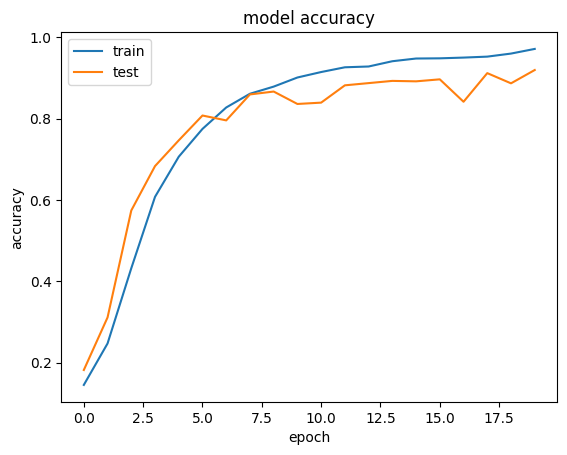

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('//content//drive//My Drive//SELLING COURSE AND PROJECTS//REAL TIME PROJECTS//Tomato Leaf Disease Detection//Data Fil//accuracy.png')

58/58 [==============================] - 1s 19ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


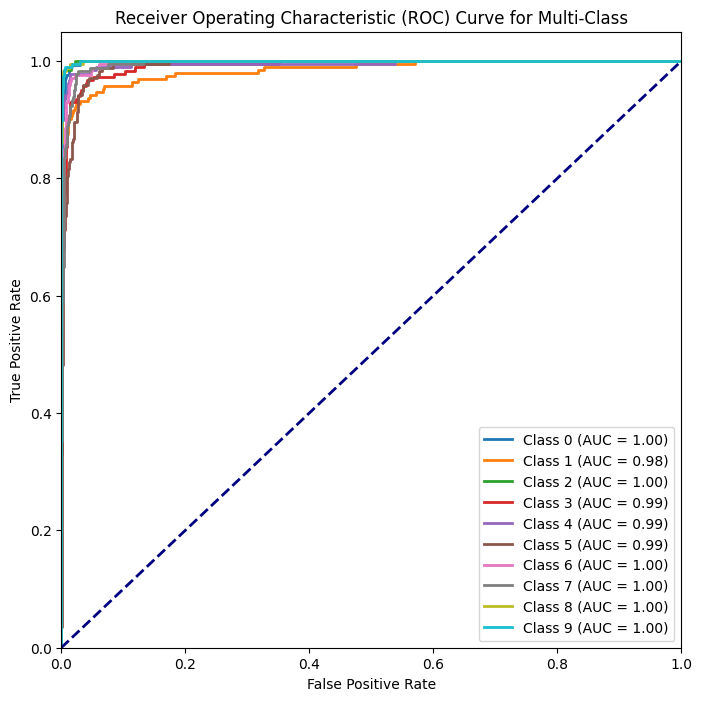

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Make predictions on the test set
y_pred_prob = model.predict(test_img_data)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(diesease_list)+1):
    fpr[i], tpr[i], _ = roc_curve(y_test_categorical[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class')
plt.legend(loc='lower right')
plt.show()

In [ ]:
model.save('//content//drive//My Drive//Tomato Leaf Disease \
 Detection//Data Files//cnn_model.hdf5')